<a href="https://colab.research.google.com/github/pablo-francisco/Fraud_Detection/blob/main/Fraud_Detection_Vanilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas

#Manipulação de dados
import pandas as pd

#DataViz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Math/Vectors

import numpy as np

#Preprocessamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Modelos

#Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

#Clusterization
from sklearn.cluster import KMeans


# NN's
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Métricas de avaliação
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
plt.style.use('default')
sns.set_style("darkgrid")
#Random seed geral para sempre obter os mesmos resultados para os modelos
np.random.seed(5)

In [ ]:
#Visualização inicial do dataframe
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#Pré Processamento inicial

In [ ]:
df[df['Amount'] == 0] = np.nan
#Eliminar valores nulos
indices_nulos = df[df.isna().any(axis=1)].index
df.drop(indices_nulos,axis=0,inplace=True)

In [ ]:
df.shape

(282982, 31)

#Visualização dos dados relevantes

Analisar a forma em como os dados estão distribuídos para as variáveis alvo

In [ ]:
dist_dados = df.groupby('Class').size().to_frame()
dist_dados.columns = ['Quantidade']
dist_dados.index = ['Normal','Anormal']

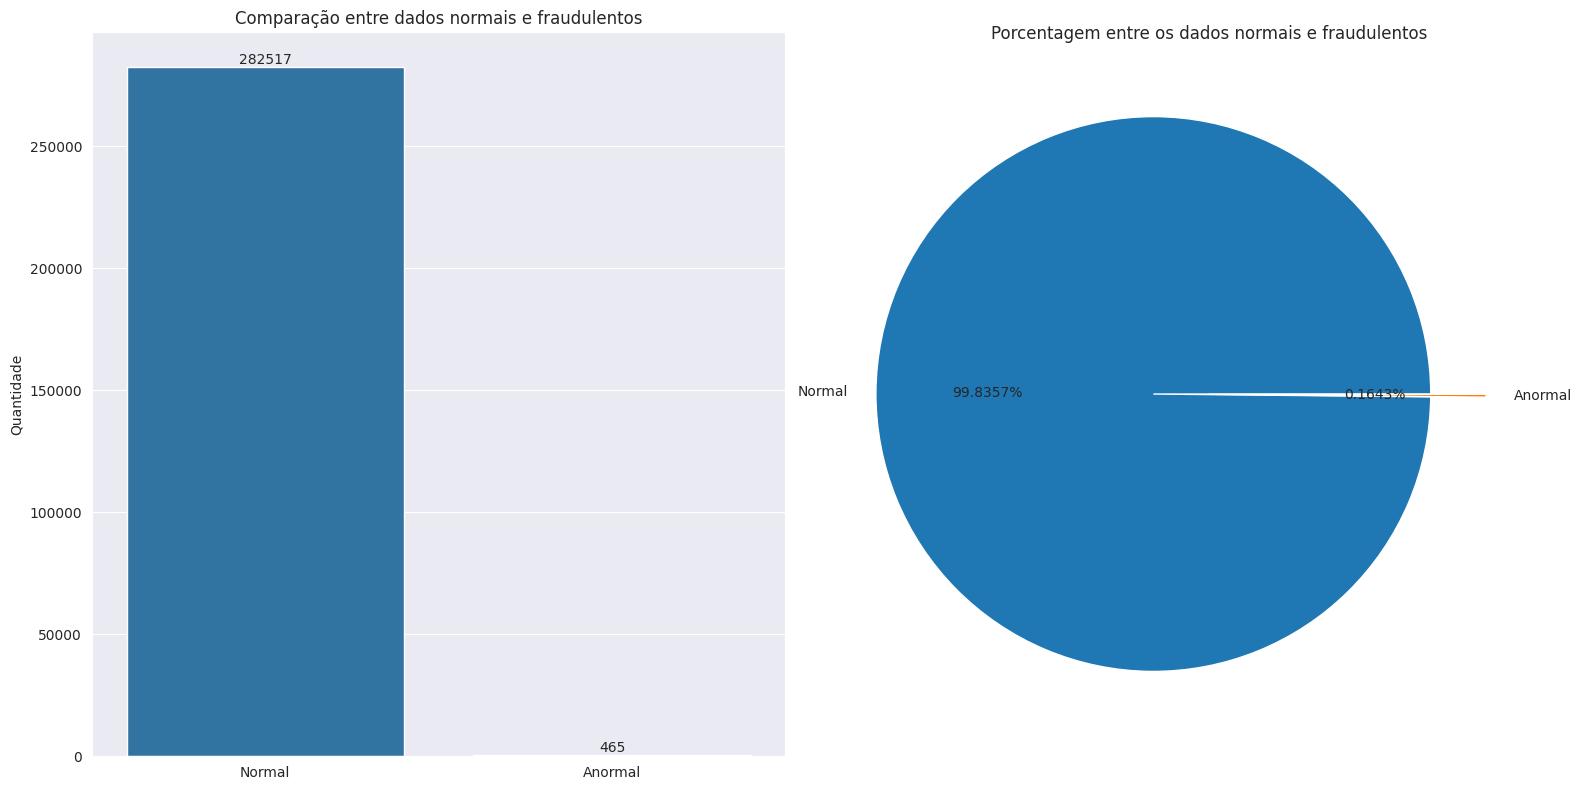

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.barplot(dist_dados,x = dist_dados.index,y='Quantidade',ax=ax[0])
for bars in ax[0].containers:
    ax[0].bar_label(bars)

ax[0].set_title('Comparação entre dados normais e fraudulentos')

dist_dados.T.sum().plot.pie(ax=ax[1], autopct='%1.4f%%',explode = (0.2,0))
#ax[1].grid()
ax[1].set_title('Porcentagem entre os dados normais e fraudulentos')

plt.tight_layout()
plt.show()

# Escalonamento de features

Foi realizado um escalonamento das features de tempo e quantia de transação, pois elas em estavam em uma escala diferente das demais variáveis e poderia ocasionar detecções imprecisas e/ou fazer o modelo não aprender adequadamente e com mais dificuldade

In [ ]:
df_scaled = df.copy()
df_scaled['Time'] = StandardScaler().fit_transform(df_scaled['Time'].to_frame())
df_scaled['Amount'] = StandardScaler().fit_transform(df_scaled['Amount'].to_frame())

In [ ]:
df_scaled.rename(columns = {'Time':'Scaled_Time', 'Amount':'Scaled_Amount'}, inplace = True)

Foi analisado que apenas a escala dos dados foi alterada, a distribuição continua a mesma e com isso não afetaria negativamente os modelos

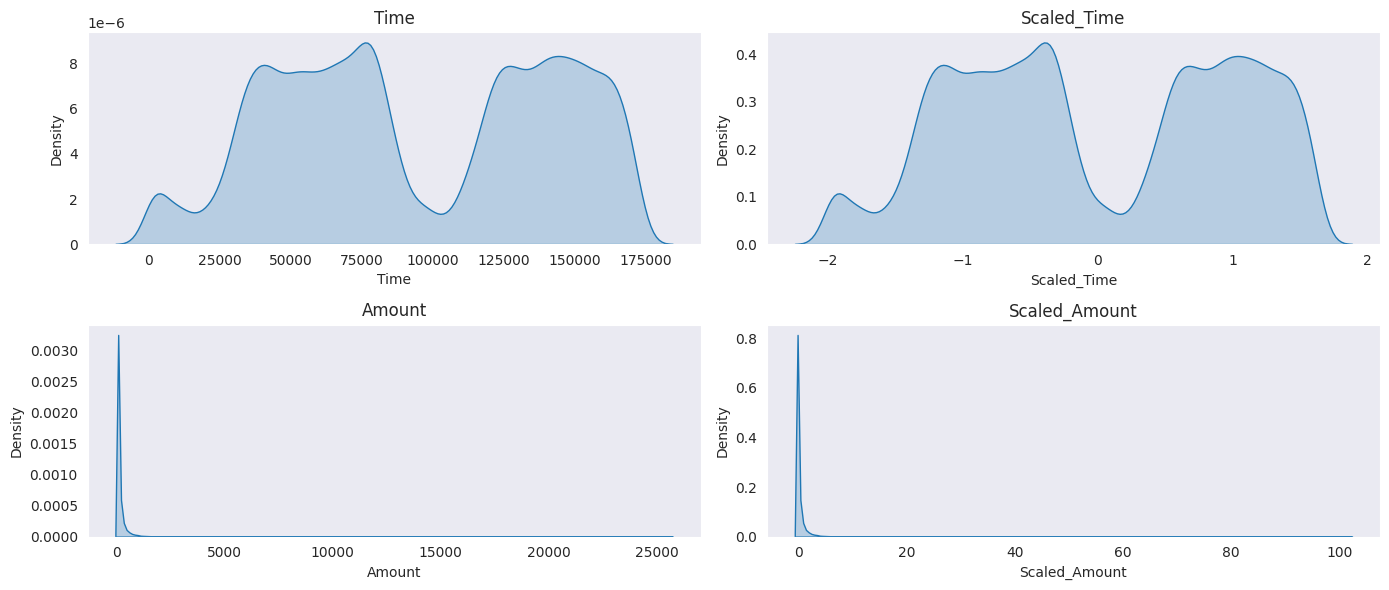

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(14,6))

cols = [
        df['Time'],df_scaled['Scaled_Time'],
        df['Amount'],df_scaled['Scaled_Amount']
        ]

for pos,graph in enumerate(cols):
  linha,coluna = int(bin(pos)[2:].zfill(2)[0]),int(bin(pos)[2:].zfill(2)[1])
  sns.kdeplot(graph,ax=ax[linha,coluna],fill=True)
  ax[linha,coluna].set_title(f'{graph.name}')
  ax[linha,coluna].grid()

plt.tight_layout()
plt.show()

#Balanceamento

Realizada uma divisão entre os dados relevantes, e os dados alvo

In [ ]:
#Divisão entre entradas e saídas
X = df_scaled.iloc[:,:-1]
y = df_scaled.iloc[:,-1]

Foi utilizado o uso do shuffle na função de divisão de dados entre treino e teste, para uma divisão de dados levando em consideração a coluna dados de períodos temporais.

 O uso do stratify é extremamente necessário para uma divisão igualitária entre os dados de treino e teste em relação aos dados de y.

 Ex.: Os dados 0 e 1 estão divididos em proporções de 97% e 3% respectivamente, passando o stratify os dados em treino e teste serão divididos de forma em que mantenha as mesmas proporções para os dados.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify = y, shuffle = True)

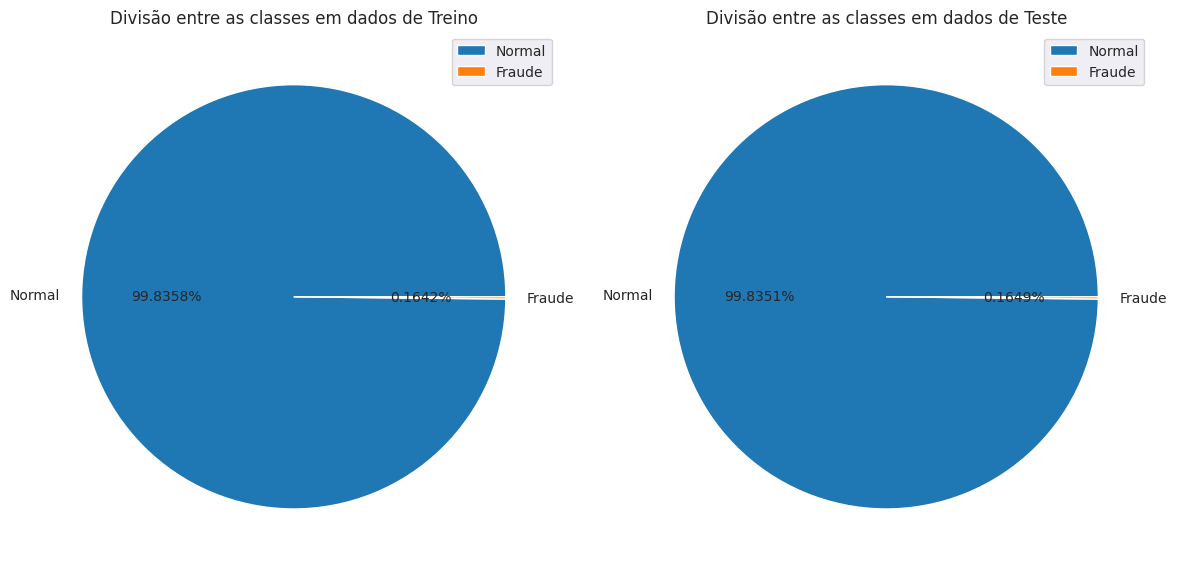

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
c_aux = [y_train.value_counts().values,y_test.value_counts().values]
c1_aux = ['Treino','Teste']
for i,j in enumerate(ax):
  ax[i].pie(x = c_aux[i],autopct='%1.4f%%',labels = ['Normal','Fraude'])
  ax[i].set_title(f'Divisão entre as classes em dados de {c1_aux[i]}')
  ax[i].legend()
plt.tight_layout()
plt.show()

O método utilizado para balancear os dados que estão desigulamente distribuidos faz uma redução nos dados de maior frequência com a finalidade de deixar os dados de diferentes classificações igualmente distribuidos.

O método conhecido como undersampling foi escolhido aqui para redução de custo computacional e tempo na modelagem dos modelos.

In [ ]:
#Balanceamento
x_under_tr, y_under_tr = RandomUnderSampler().fit_resample(x_train, y_train)

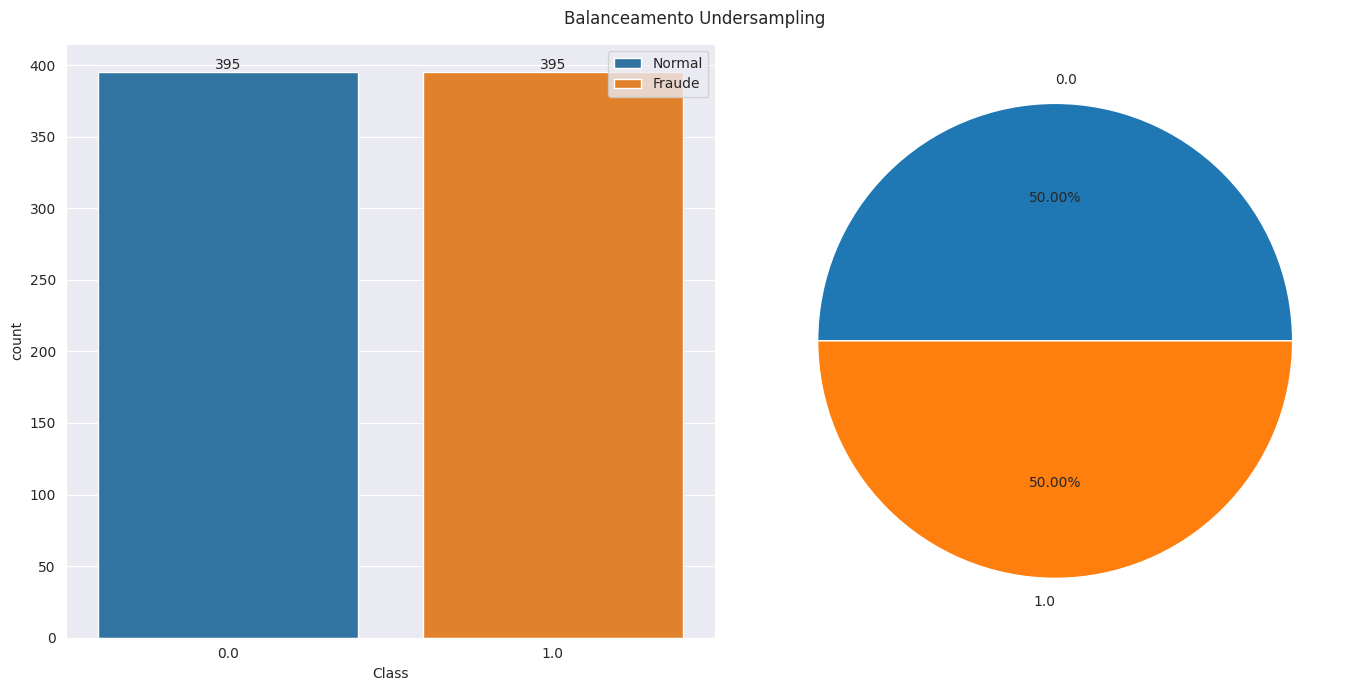

In [ ]:
fig , ax = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x = y_under_tr,label = ['Normal','Fraude'],ax=ax[0])
ax[0].legend()
for bars in ax[0].containers:
    ax[0].bar_label(bars)
y_under_tr.to_frame().groupby('Class').size().plot.pie(autopct='%1.2f%%',ax=ax[1])
fig.suptitle('Balanceamento Undersampling')
plt.tight_layout()
plt.show()

#Análises de correlações

Os heatmaps indicam a correlação por meio de tons de cores, onde no caso as variáveis mais relevantes para a variável desejada são as de tom mais escuro.

Como utilizando os dados puros originais a correlação é quase imperceptível, realizamos um reescalonamento para as features de tempo e de quantias, para uma relação mais clara entre os dados 

Os graus de correlação são divididos em:

*   Sem Correlação: $x = 0\%$
*   Grau baixo: $x<±\:30\%$
*   Grau médio: $±\:30\%< x<\pm\:50\%$
*   Grau alto: $±\:50\%< x<\pm\:100\%$
*   Perfeito: $x = \pm\: 100\%$


Onde um valor sem correlação não causa impacto em outro, e um valor com 100% de correlação é diretamente/inversamente proporcional à outro.

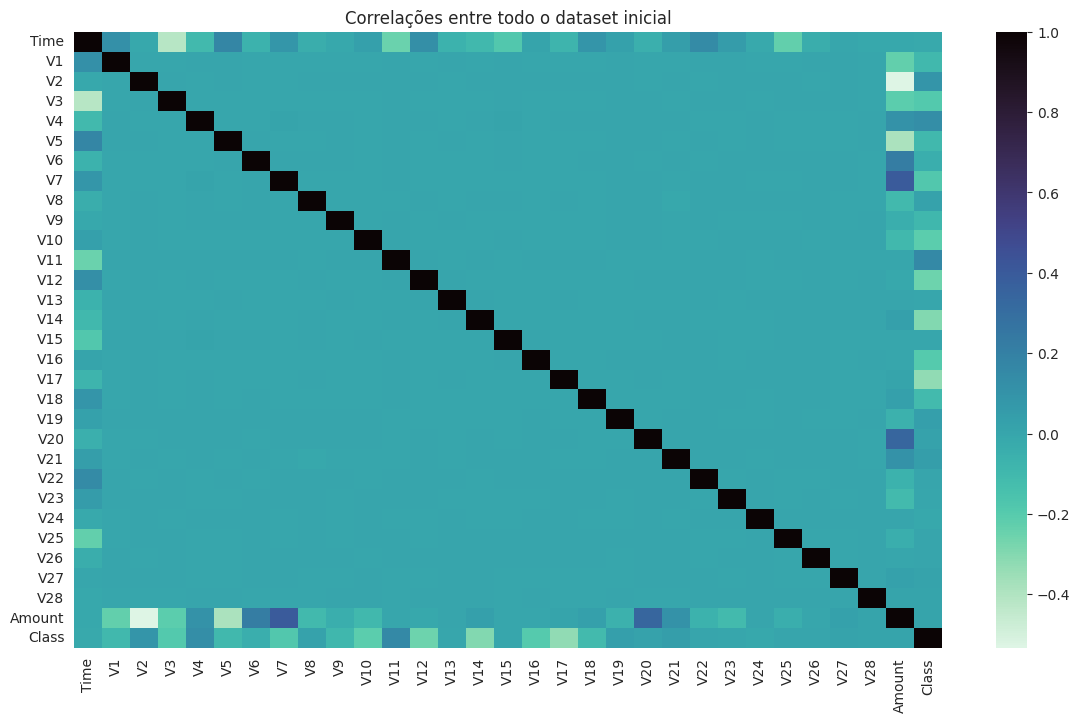

In [ ]:
pal = sns.color_palette('mako_r', as_cmap=True)
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),cmap = pal)
plt.title('Correlações entre todo o dataset inicial')
plt.show()

Após usada técnicas de balanceamento foi feito o heatmap novamente para analisar possíveis correlações não detectadas antes

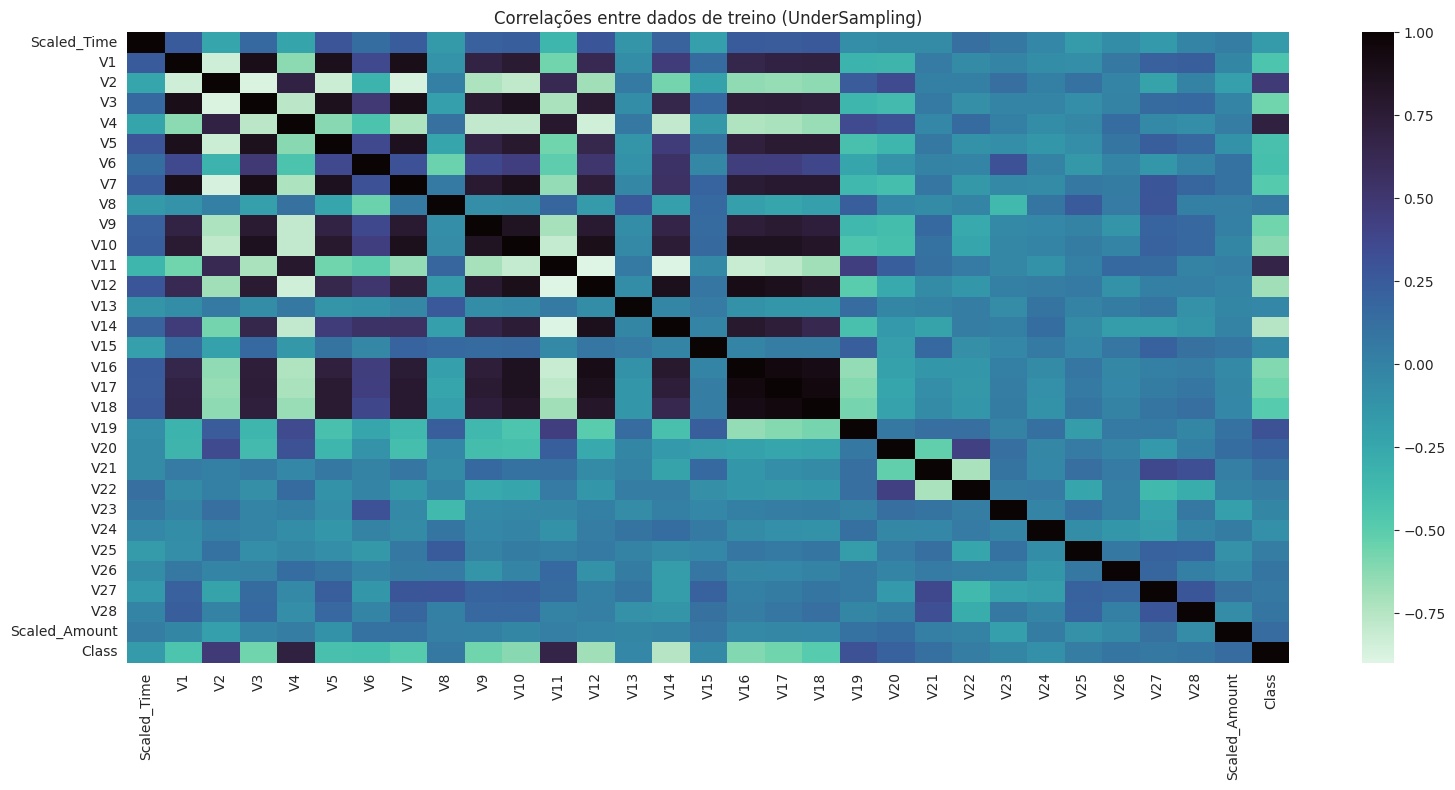

In [ ]:
pal = sns.color_palette('mako_r', as_cmap=True)
fig,ax = plt.subplots(figsize=(16,8))
dados_under = pd.concat([x_under_tr,y_under_tr],axis=1)
sns.heatmap(dados_under.corr(),cmap = pal)
ax.set_title('Correlações entre dados de treino (UnderSampling)')


plt.tight_layout()
plt.show()

Percebe-se que há uma correlação maior entre as features V2,V4 e V11 para a classificação do modelo

In [ ]:
def correlacao_alta(dados,porcentagem):
  #Estimar as variaveis que possuem maior correlação entre si
  correlacoes_escaladas = dados.corr().copy()
  if porcentagem >0:
    valores_porc = correlacoes_escaladas[(correlacoes_escaladas>=porcentagem)]
  else:
    valores_porc = correlacoes_escaladas[(correlacoes_escaladas<=porcentagem)]
  valores_porc = valores_porc[valores_porc != 1]
  importante_corr = []
  for i,j in enumerate(valores_porc.columns):
    importante_corr.append(valores_porc[valores_porc.columns[i]].dropna(axis=0).to_frame())
  pal = sns.color_palette('mako_r', as_cmap=True)
  importante_corr = pd.concat(importante_corr,axis=1).dropna(axis=1,how='all')
  plt.figure(figsize=(14,8))
  sns.heatmap(importante_corr,cmap = pal)
  if porcentagem >0:
    plt.title(f'Filtro de correlações >= {porcentagem*100}%')
  else:
    plt.title(f'Filtro de correlações <= {porcentagem*100}%')
  plt.show()

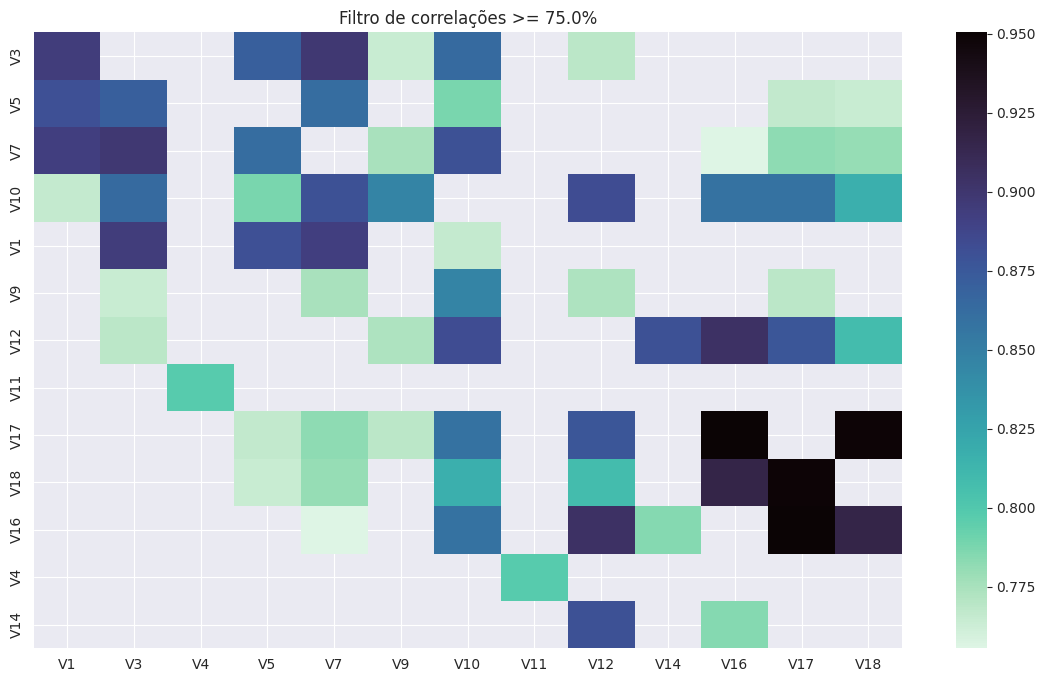

In [ ]:
correlacao_alta(dados_under,0.75)

Acima é possível alterar a porcentagem para visualizar as colunas que mais se relacionam entre si, como as variáveis estão criptografadas é difícil tirar mais informações relevantes, apenas indicar as possíveis dependências entre elas.

#Métricas de avaliação e funções auxiliares



*   Métricas:

  1. Precision: Mede a precisão do modelo em classificar corretamente exemplos positivos:
    \begin{align}
    \\
    Precision = \frac{verdadeiros_{pos}}{verdadeiros_{pos}+falsos_{pos}}
    \end{align}

  2. Recall: Mede a capacidade do modelo de classificar corretamente todos os exemplos positivos:
    \begin{align}
    \\
    Recall = \frac{verdadeiros_{pos}}{verdadeiros_{pos}+falsos_{neg}}
    \end{align}
  
  2. F1-Score: Mede a capacidade do modelo de classificar corretamente todos os exemplos positivos:
    \begin{align}
    \\
    F1_{Score} = 2\times\frac{Precision \times Recall}{Precision+Recall}
    \end{align}

In [ ]:
#Função para reportar as métricas de avaliação, assim como a matriz de confusão dando uma noção visual de erro de mais fácil compreensão.
def report_to_graph(y_test, y_pred,modelo):

  metricas = pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))


  fig,ax = plt.subplots(1,3,figsize=(16,8))
  abs_metrics = round(metricas.iloc[:-1,:2]*100,2)
  acc = round(metricas["accuracy"].values.mean()*100,2)
  mean_metrics = round(metricas[['macro avg','weighted avg']][:-1]*100,2)

  abs_metrics.plot.bar(ax=ax[0])
  ax[0].legend(loc ='lower right', labels =['Normal','Anormal'] )
  ax[0].set_ylabel('Métrica (%)')

  mean_metrics.plot.bar(ax=ax[1])
  ax[1].legend(loc ='lower right',labels = ['Média Macro','Média Ponderada'])
  ax[1].set_ylabel('Métrica (%)')
  for bars in ax[0].containers:
      ax[0].bar_label(bars,fontsize=8)
  for bars in ax[1].containers:
      ax[1].bar_label(bars,fontsize=8)

  sns.heatmap(confusion_matrix(y_test, y_pred), ax = ax[2], annot = True,fmt = '.5g')
  ax[2].set_ylabel('Verdadeiros')
  ax[2].set_xlabel('Previstos')
  
  ax[0].set_title('Métricas de avaliação')
  ax[1].set_title('Médias das métricas')
  ax[2].set_title('Matriz de confusão')

  fig.suptitle(f'Modelo de {modelo} com acurácia de {acc}%')
  plt.tight_layout()
  plt.show()
  return pd.DataFrame(confusion_matrix(y_test, y_pred),index = ['Real Normal','Real Fraude'],columns = ['Previsão Normal','Previsão Fraude'])

In [ ]:
#Usando captar os modelos de fraudes detectados e não detectados e estipular os valores deles com base nos dados originais
def capital_modelo(df,y_test,y_pred):
  df_filter_money = pd.concat([y_test,pd.DataFrame(y_pred,index = y_test.index,columns = ['Pred'])],axis=1)

  #Filtros
  fraudes_nd = df_filter_money[(df_filter_money['Class'] == 1) & (df_filter_money['Pred'] == 0)].index
  fraudes_d = df_filter_money[(df_filter_money['Class'] == 1) & (df_filter_money['Pred'] == 1)].index

  #Insights de capital
  amount_lost = df.filter(fraudes_nd,axis=0)['Amount'].values
  amount_recovered = df.filter(fraudes_d,axis=0)['Amount'].values
  return amount_lost,amount_recovered

Qualquer modelo de Machine Learning/Deep Learning estão sujeitos a falhas, pois é impossível ocorrer uma taxa de 100% de previsão de determinada feature. Levando isso em consideração, os modelos podem cometer as seguintes falhas:



*   Estimar N transações que nas quais eram fraudadas como normais,podendo acarretar em:

  1. Prejuízo financeiro para o banco/empresa responsável.
  2. A depender da quantia pode causar inúmeras consequências para a empresa e terceiros.


*   Estimar K transações tabeladas como fraude, onde a realidade é outra, como não há um prejuízo real podemos tomar as seguintes medidas de segurança:

  1. Quando uma estimação parecer suspeita, segundo o modelo, contactar o usuário ou empresa cadastrada para uma etapa extra para a confirmação de transação. Como por exemplo o uso de perguntas de segurança criadas no momento da filiação entre o cliente e a responsável por gerenciar a transação.







#Modelos Supervisionados

##Regressão Logística

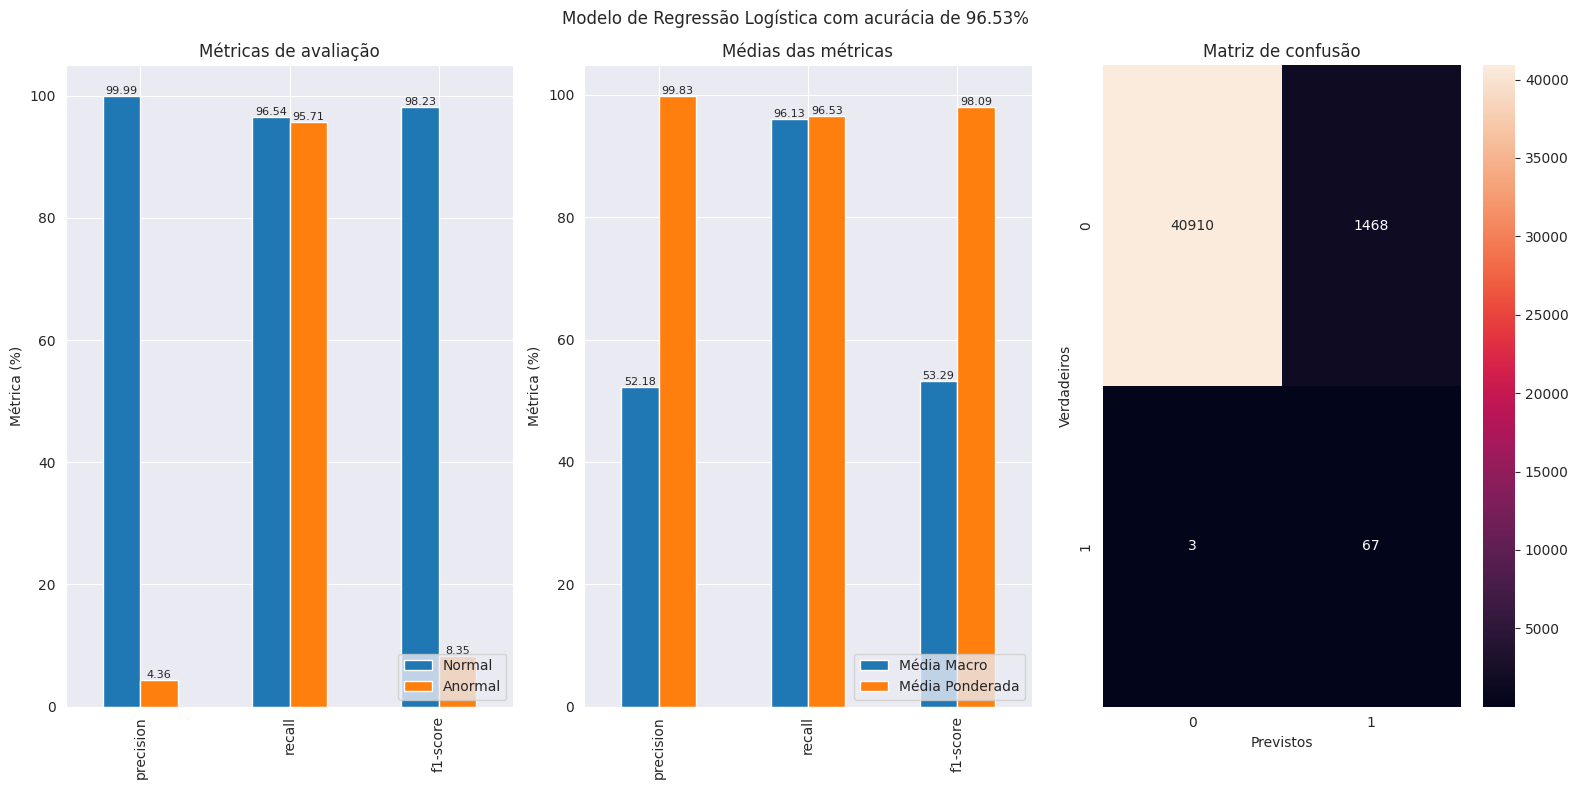

In [ ]:
LR_us = LogisticRegression()
LR_us.fit(x_under_tr, y_under_tr)
y_pred_LR_us = LR_us.predict(x_test)
mx_LR = report_to_graph(y_test, y_pred_LR_us,'Regressão Logística')
amount_l_LR,amount_r_LR = capital_modelo(df,y_test,y_pred_LR_us)

##Decision Tree Class

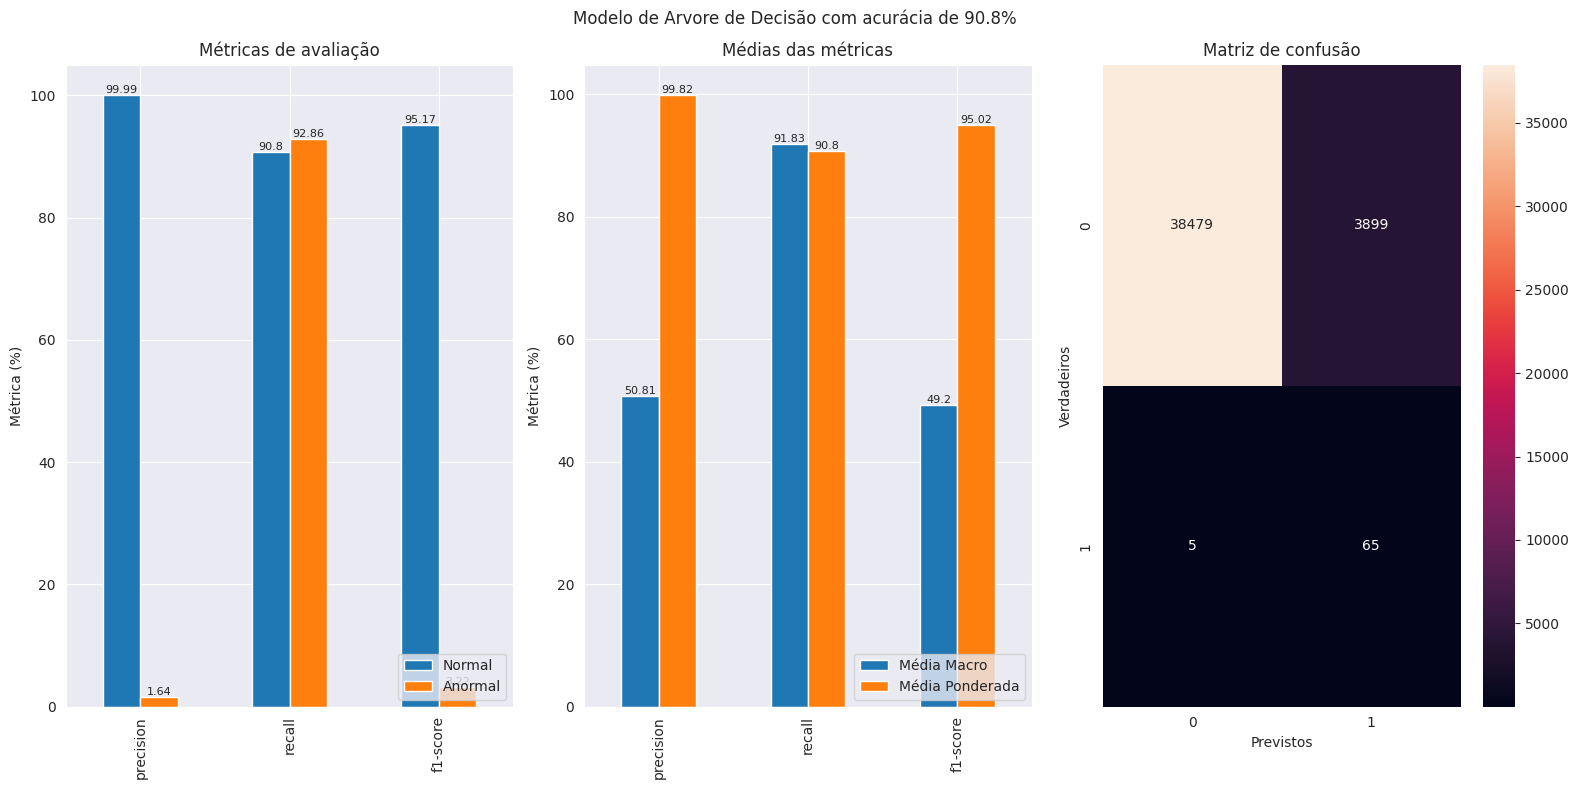

In [ ]:
DT_us = DecisionTreeClassifier()
DT_us.fit(x_under_tr,y_under_tr)
y_pred_DT_us = DT_us.predict(x_test)
mx_DT =report_to_graph(y_test, y_pred_DT_us,'Arvore de Decisão')
amount_l_DT,amount_r_DT = capital_modelo(df,y_test,y_pred_DT_us)

##Modelo K-Neighboors

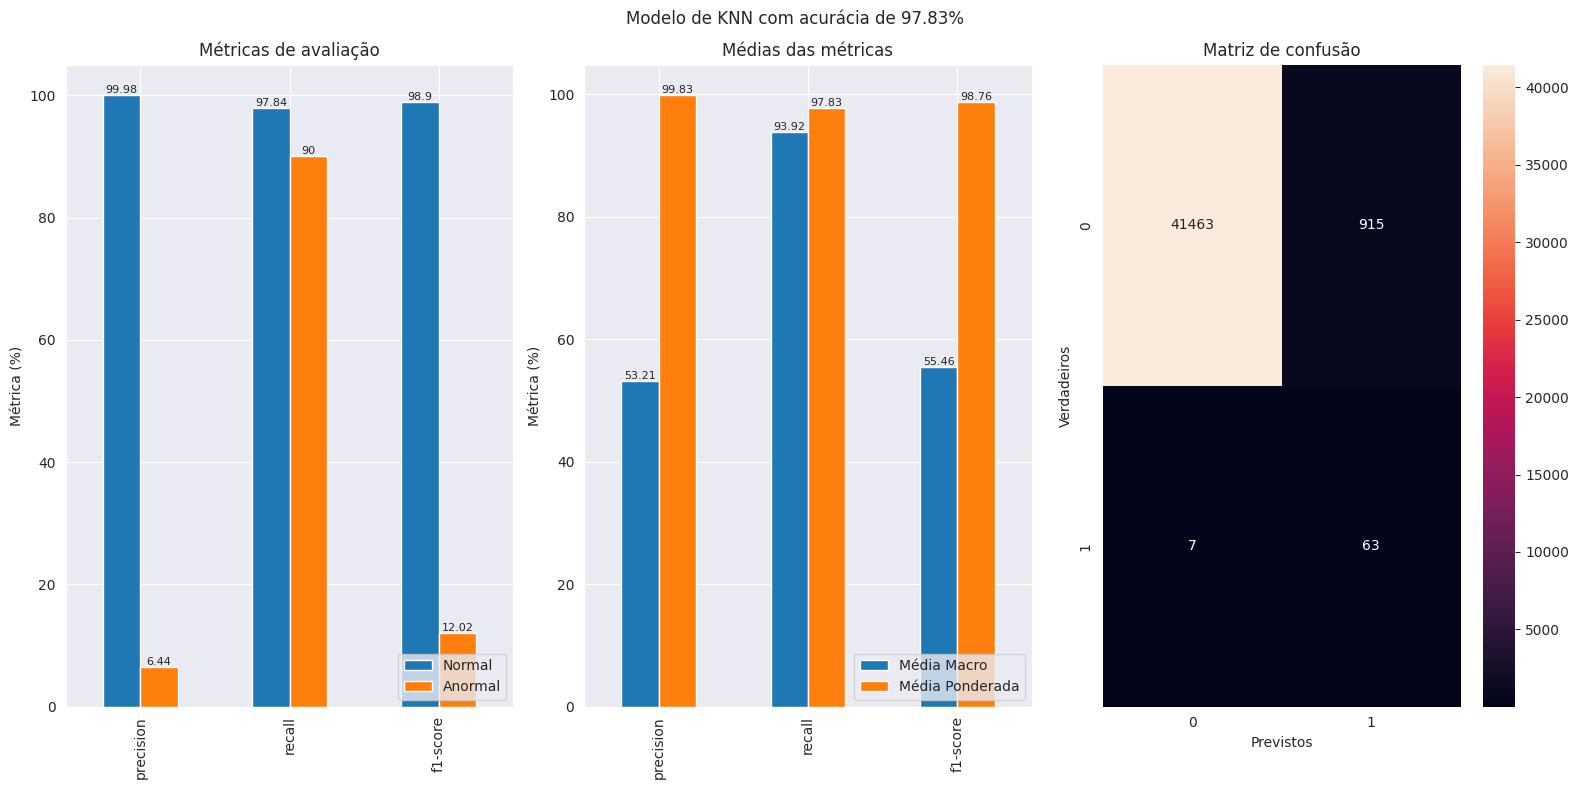

In [ ]:
KNN_us = KNeighborsClassifier()
KNN_us.fit(x_under_tr,y_under_tr)
y_pred_KNN_us = KNN_us.predict(x_test)
mx_KNN = report_to_graph(y_test, y_pred_KNN_us,'KNN')
amount_l_KNN,amount_r_KNN = capital_modelo(df,y_test,y_pred_KNN_us)

##SVM Classifier

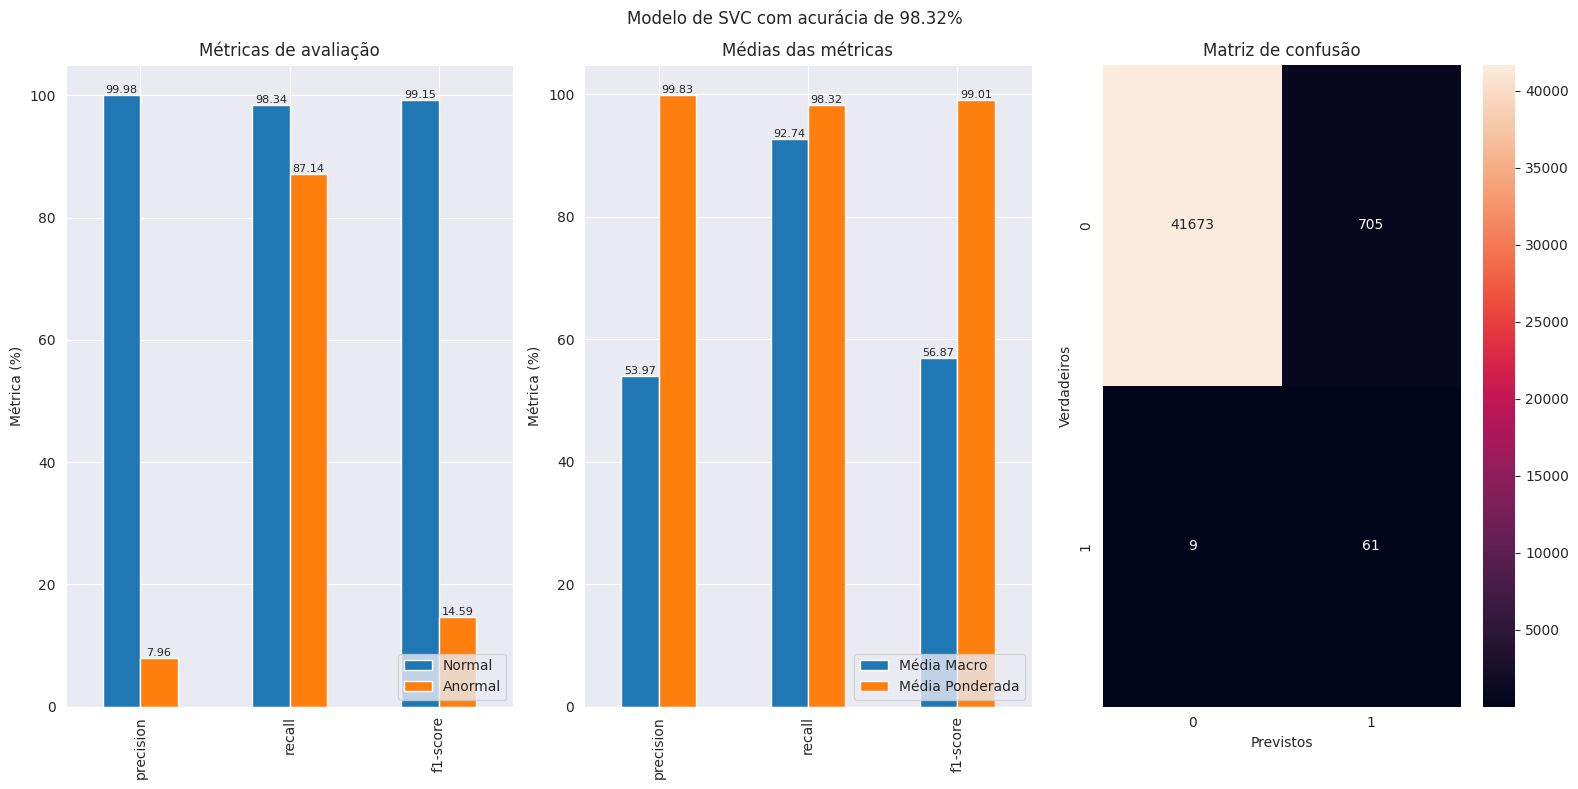

In [ ]:
SVC_us = SVC()
SVC_us.fit(x_under_tr,y_under_tr)
y_pred_SVC_us = SVC_us.predict(x_test)
mx_SVC = report_to_graph(y_test, y_pred_SVC_us,'SVC')
amount_l_SVC,amount_r_SVC = capital_modelo(df,y_test,y_pred_SVC_us)

##Random Forest

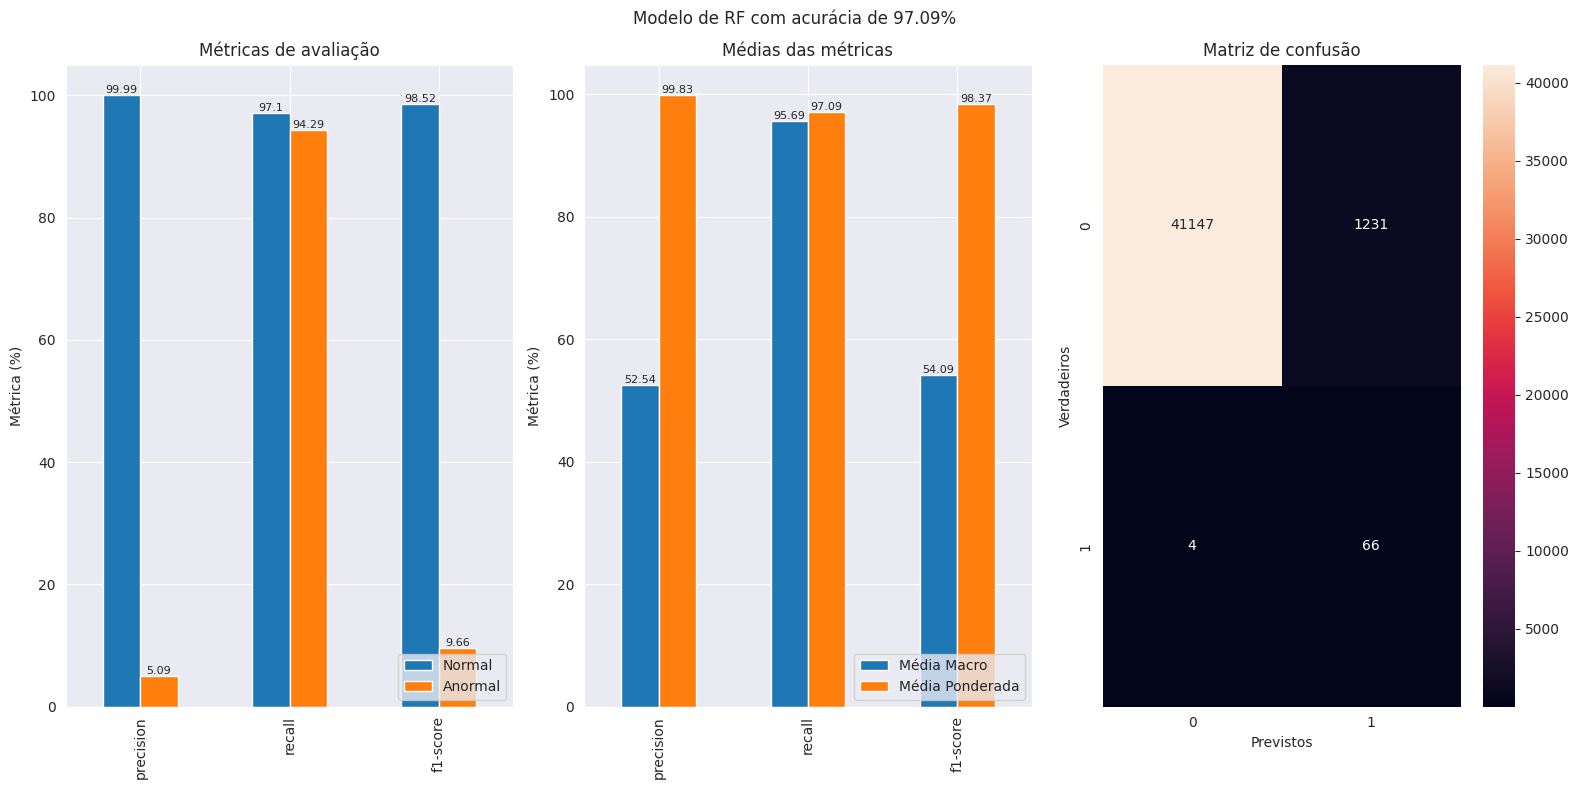

In [ ]:
RF_us = RandomForestClassifier()
RF_us.fit(x_under_tr,y_under_tr)
y_pred_RF_us = RF_us.predict(x_test)
mx_RF =report_to_graph(y_test, y_pred_RF_us,'RF')
amount_l_RF,amount_r_RF = capital_modelo(df,y_test,y_pred_RF_us)

## ANN (Artificial Neural Network)

In [ ]:
def ANN_classifier(x_under_tr,y_under_tr,De_L,Dr_L,epcs,bs):
  classifier = Sequential()
  
  #Camada inicial de entrada da rede, seguida de um dropout
  classifier.add(Dense(units = De_L[0], kernel_initializer = 'uniform', activation = 'relu', input_dim = (x_under_tr.shape[1])))
  classifier.add(Dropout(rate = Dr_L[0]))

  classifier.add(Dense(units = De_L[1], kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dropout(rate = Dr_L[1]))

  #Camada final que recebe a saída
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Fitting the ANN to the Training set
  history = classifier.fit(x_under_tr, y_under_tr, batch_size = bs, epochs = epcs,verbose = 0)
  pd.DataFrame(history.history).plot(figsize=(12,6))
  return classifier

1327/1327 [==============================] - 2s 1ms/step


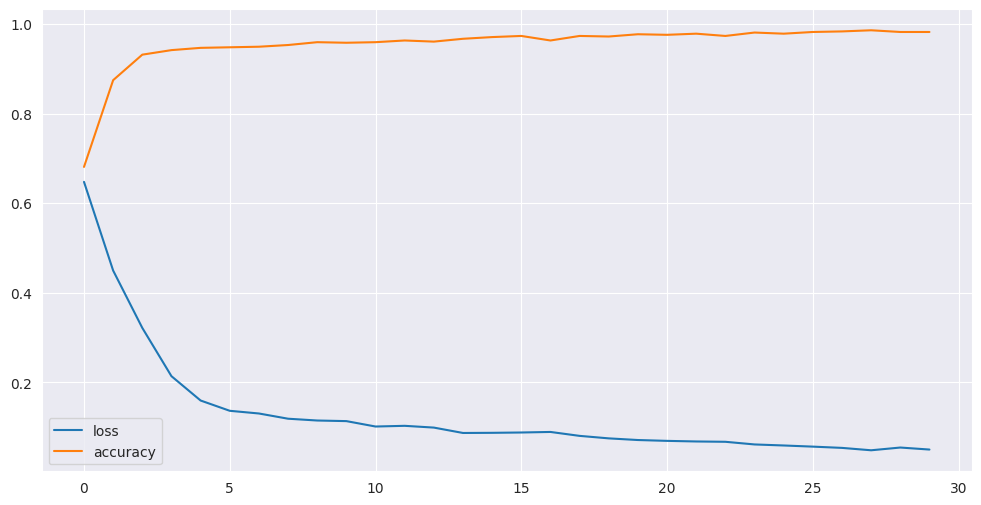

In [ ]:
De_L = [64,32] #Células dos layers da rede
Dr_L = [0.2,0.2] #Células de porcentagem de dropout dos layers
ANN_model = ANN_classifier(x_under_tr,y_under_tr,De_L,Dr_L,30,32)
y_pred_ANN = ANN_model.predict(x_test)

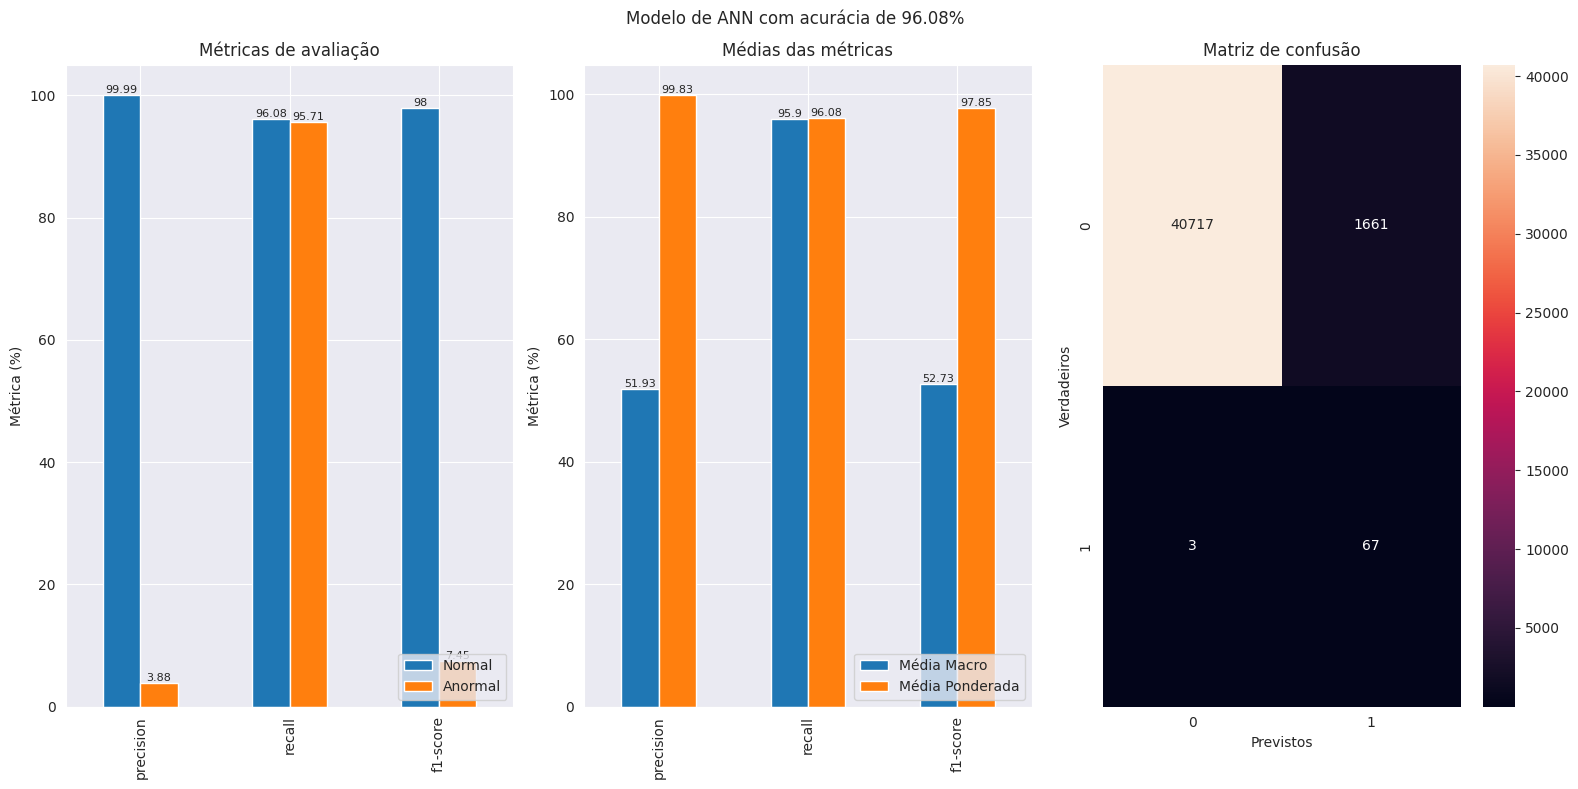

In [ ]:
# Como a previsão retorna valores float, é necessário fazer um treshold de 50%
y_pred_ANN = [1 if i>=0.5 else 0 for i in y_pred_ANN]

#Agruapando dados em dataset
df_ANN = pd.concat([y_test,pd.DataFrame(y_pred_ANN,index= y_test.index,columns = ['ANN'])],axis=1)
mx_ANN = report_to_graph(df_ANN['Class'].values, df_ANN['ANN'].values,'ANN')
amount_l_ANN,amount_r_ANN = capital_modelo(df,df_ANN['Class'], df_ANN['ANN'].values)

#Modelos Não-Supervisionados

##K-Means Cluster

In [ ]:
df_concated_train_under = pd.concat([x_under_tr,y_under_tr],axis=1)
df_concated_test = pd.concat([x_test,y_test],axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


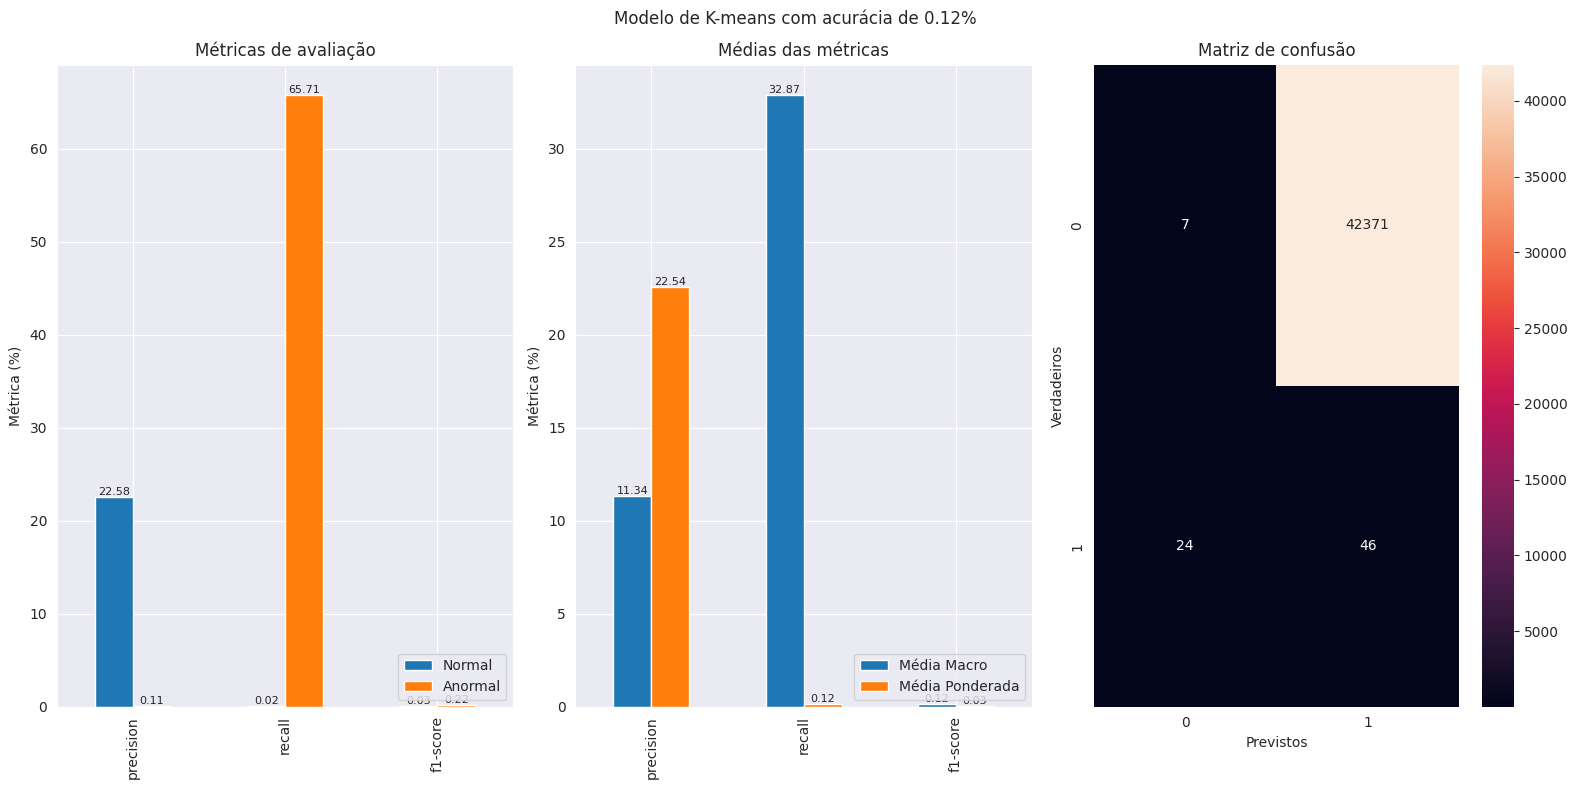

In [ ]:
K_m= KMeans(n_clusters = 2, init = 'k-means++',max_iter = 5000)
K_m.fit(df_concated_train_under)
Cluster_test = df_concated_test.copy()
Cluster_test['Cluster'] = K_m.predict(df_concated_test)
mx_KMEAN = report_to_graph(Cluster_test['Class'], Cluster_test['Cluster'],'K-means')
amount_l_KMEAN,amount_r_KMEAN = capital_modelo(df,Cluster_test['Class'], Cluster_test['Cluster'].values)

#Comparação entre os modelos

In [ ]:
comp_results = pd.DataFrame()
colunas = ['LR','DT','KNN','SVC','RF','K-means','ANN']
matrizes = [mx_LR,mx_DT,mx_KNN,mx_SVC,mx_RF,mx_KMEAN,mx_ANN]
for i,j in enumerate(colunas):
  comp_results[j]=[matrizes[i].iloc[0,1],matrizes[i].iloc[1,0]]
comp_results.index = ['Falsa Fraude','Falso Normal']

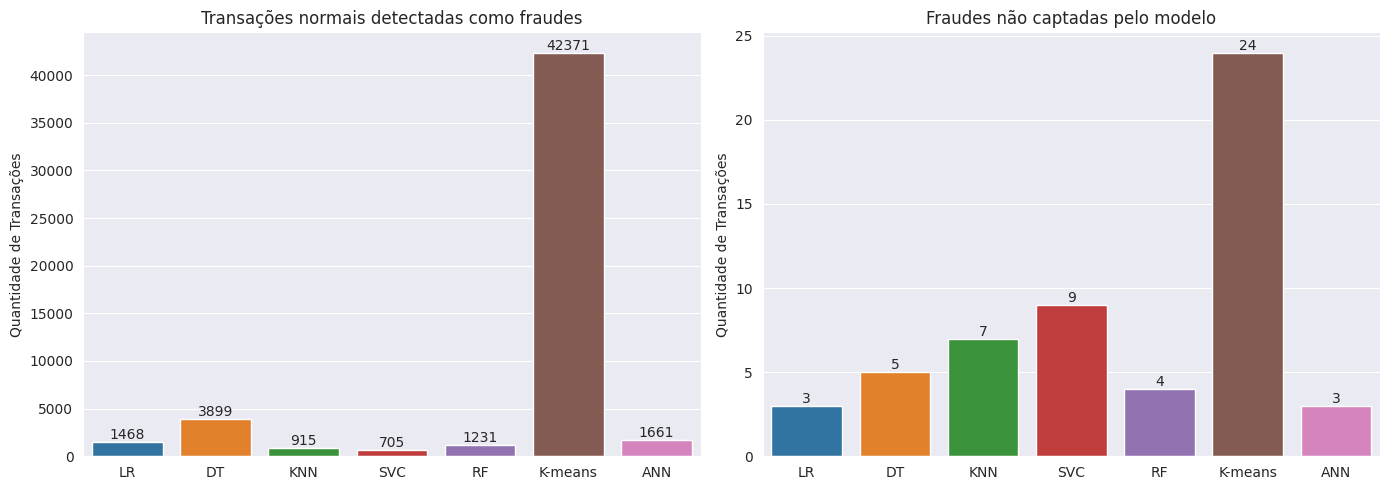

In [ ]:

fig,ax = plt.subplots(1,2,figsize=(14,5))

fake_fraude =comp_results.iloc[:1,:] 

sns.barplot(fake_fraude,ax=ax[0])
ax[0].set_title('Transações normais detectadas como fraudes')
ax[0].set_ylabel('Quantidade de Transações')


for bars in ax[0].containers:
    ax[0].bar_label(bars)

fake_normal =comp_results.iloc[1:,:] 

sns.barplot(fake_normal,ax=ax[1])
ax[1].set_title('Fraudes não captadas pelo modelo')
ax[1].set_ylabel('Quantidade de Transações')


for bars in ax[1].containers:
    ax[1].bar_label(bars)

plt.tight_layout()
plt.show()

Tendo os dados de desempenho em evidência o modelo mais promissor é a Regressão Logistica junto com  a ANN e Random Forest, na qual as detecções de ações fraudulentas que não foram detectadas obtiveram a com menor quantidade de erros e obteve um número relativamente menor em relação aos outros modelos quanto a classificar uma transação normal como fraudulenta.

##Analisando os dados previstos para fraudes do ponto de vista financeiro

Utilizando a função implementada para pegar a quantiade de valores perdidos e ganhos para cada modelo foi utilizada logo após a estimação de cada um dos mesmos.

In [ ]:
quantias_predidas_modelos = [amount_l_LR,amount_l_DT,amount_l_KNN,amount_l_SVC,amount_l_RF,amount_l_KMEAN,amount_l_ANN]
quantias_recuperadas_modelos = [amount_r_LR,amount_r_DT,amount_r_KNN,amount_r_SVC,amount_r_RF,amount_r_KMEAN,amount_r_ANN]
lost_money = pd.DataFrame(quantias_predidas_modelos).T
lost_money.columns = ['LR','DT','KNN','SVC','RF','KMEAN','ANN']
recovered_money = pd.DataFrame(quantias_recuperadas_modelos).T
recovered_money.columns = lost_money.columns
comp_lost_gain = pd.concat([recovered_money.sum(),lost_money.sum()],axis=1)
comp_lost_gain.columns = ['Ganhos','Percas']

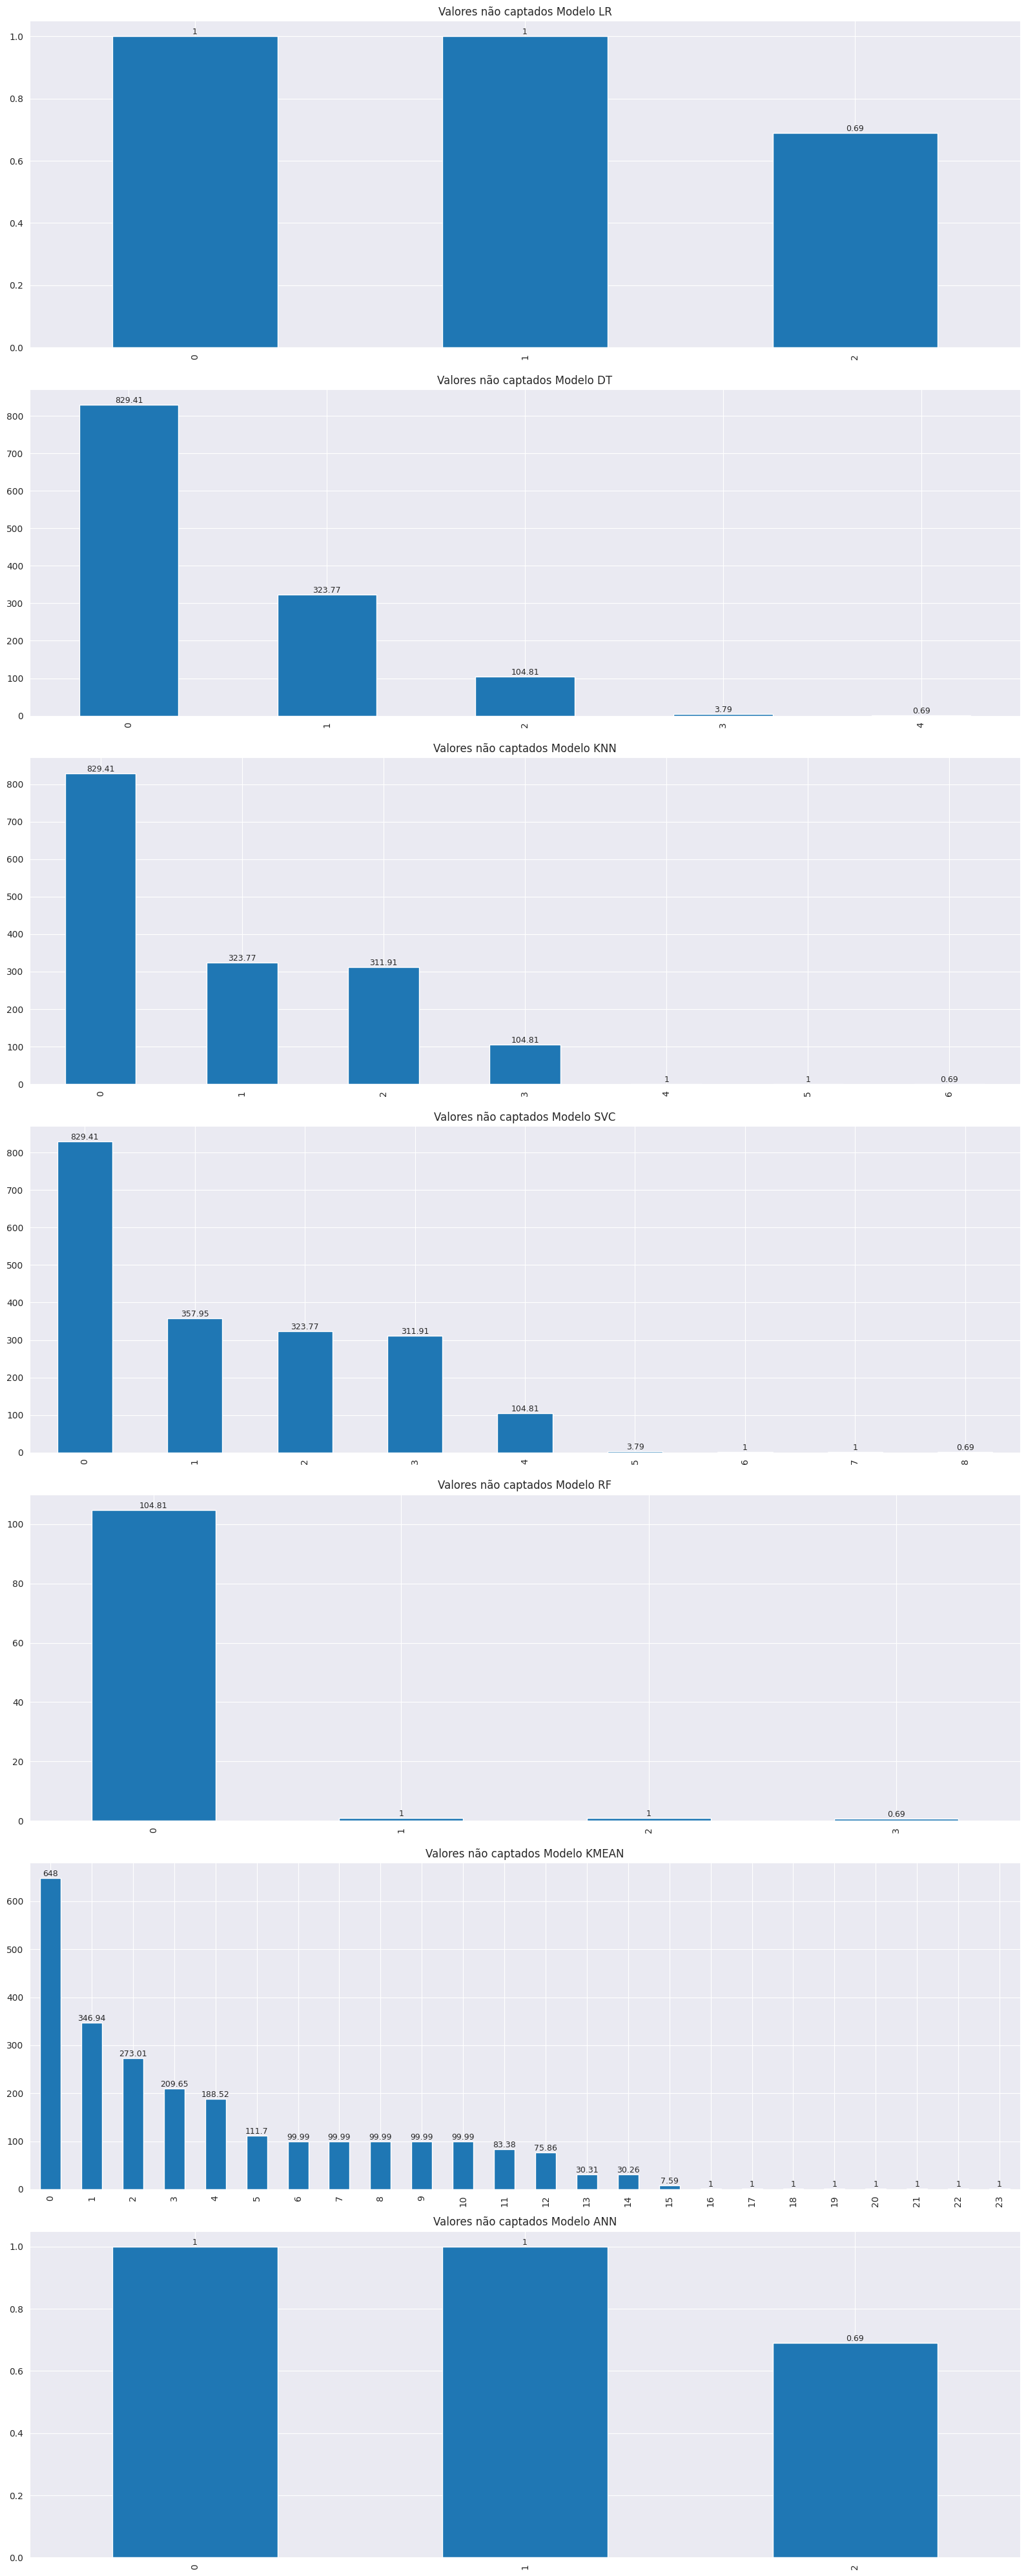

In [ ]:
fig,ax = plt.subplots(len(lost_money.columns),1,figsize=(16,40))
for i,j in enumerate(lost_money.columns):
  lost_money[j].dropna().sort_values(ascending=False).reset_index(drop=True).plot.bar(ax=ax[i])
  ax[i].set_title(f'Valores não captados Modelo {j}')
  for bars in ax[i].containers:
      ax[i].bar_label(bars,fontsize=9)
plt.tight_layout()
plt.show()

Com os gráficos acima, nota-se um padrão em certas quantidades de dinheiro que os modelos em geral foram ineficientes, por exemplo o de 0.69 $ que está presente em todos os modelos supervisionados. Obviamente não é só a quantia que determina se a fraude será detectada ou não, mas de acordo com os dados, há uma possibilidade mais evidente que isso possa ocorrer com determinado valor.

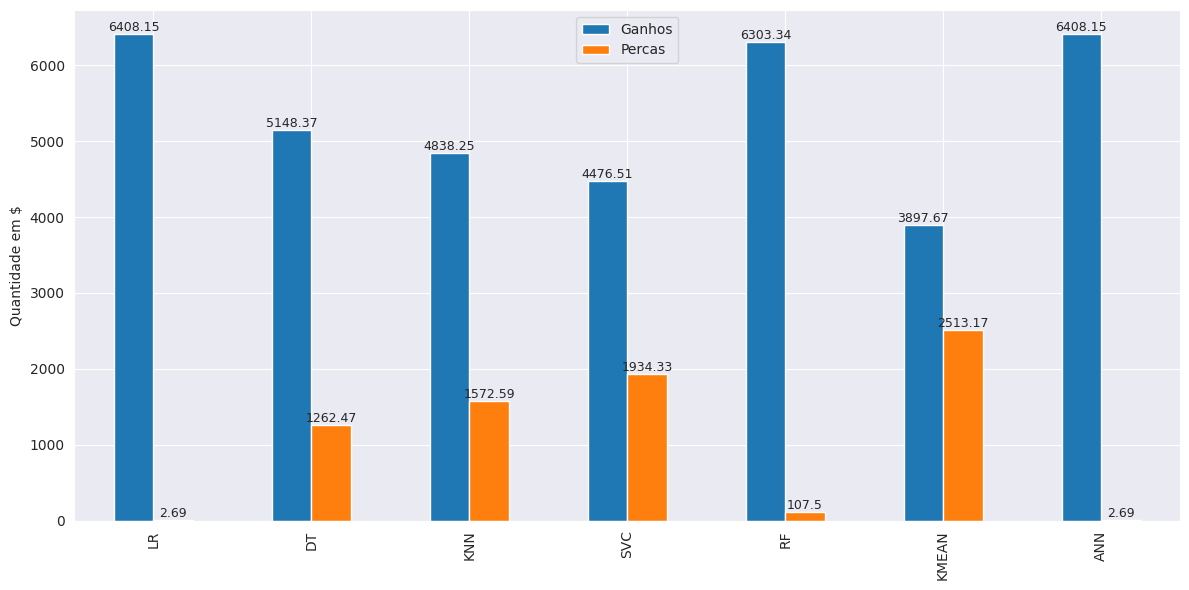

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
comp_lost_gain.plot.bar(ax=ax)
ax.set_ylabel('Quantidade em $')
for bars in ax.containers:
    ax.bar_label(bars,fontsize=9)
plt.tight_layout()
plt.show()

Nota-se que o modelo tomado como com um melhor "custo-benefício" em relação aos erros, a regressão logística em paralelo com a ANN foram os modelos onde gerou um menor impacto financeiro e inversamente proporcional a isso interceptou uma maior quantidade de capital que seria desviado.

Concluindo-se analisando do ponto de vista financeiro há 2 modelos concorrentes, porém a rede neural artificial não possui um modelo de parâmetros internos padrão em sua estrutura, logo ela pode naturalmente se desempenhar melhor dependendo da escolha da arquitetura da mesma.

Para uma avaliação além da financeira, é notada em um dos gráficos acima que a Regressão Logística possui uma menor quantidade de erros na classificação de suas fraudes, logo pode ser considerado o modelo mais efetivo dentre os testados em suas configurações base.